# Plot chains

This notebook shows how to use GetDist to plot MCMC chains

In [116]:
# Imports
import sys  
sys.path.insert(0, '/Users/Pablo/Projets/covid_mcmc/')
#from SIR_model import *
from SIR_model_pl import *
from getdist.mcsamples import loadMCSamples
import getdist.plots as gdplt
from matplotlib import pyplot as plt
%matplotlib inline 

Data file not found


Load the samples

In [139]:
gdsamples2 = loadMCSamples('../chains/simple', settings={'smooth_scale_2D':0.6, 'smooth_scale_1D':0.5})
gdsamples3 = loadMCSamples('../chains/quarantine_simple', settings={'smooth_scale_2D':0.6, 'smooth_scale_1D':0.5})
gdsamples = loadMCSamples('../chains/quarantine_global', settings={'smooth_scale_2D':0.6, 'smooth_scale_1D':0.5})

Generate the plot

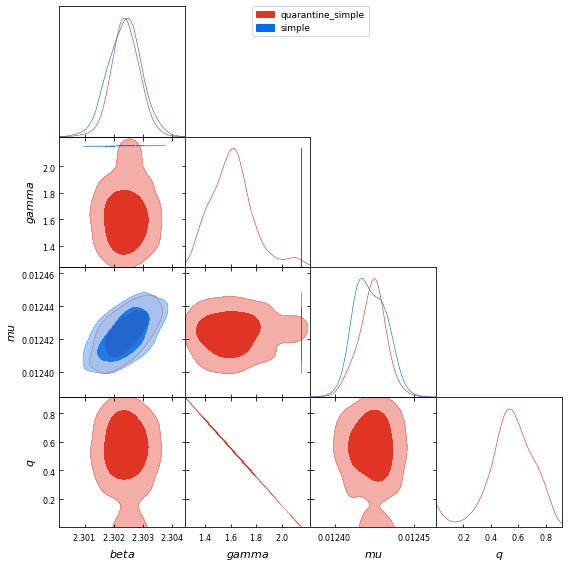

In [145]:
g = gdplt.get_subplot_plotter()
g.triangle_plot([gdsamples3, gdsamples2], ['beta', 'gamma', 'mu','q'], filled=True)

In [141]:
bestfit = gdsamples3.getParamBestFitDict(best_sample=True)
beta_bf = bestfit['beta']
gamma_bf = bestfit['gamma']
q_bf =  bestfit['q']
mu_bf =  bestfit['mu']

In [142]:
I_data, i_firstcase = read_data('../data/time_series_covid19_confirmed_global.csv', country = 'United Kingdom')
I_data = I_data[i_firstcase:]

D_data, _ = read_data('../data/time_series_covid19_deaths_global.csv', country = 'United Kingdom', undo_cumulative=False)
D_data = D_data[i_firstcase:]
D_data = np.clip(D_data, a_min = 1e-1, a_max = None)

# Correct two big outliers
#I_data[152] = I_data[151]
#I_data[153] = I_data[154]
I_data= I_data[:150]
D_data= D_data[:150]

# Total population, N.
N = 66.65*1e6 # Approximate population of the UK
# Number of days.
ndays = len(I_data)

# Initial number of infected and recovered individuals, I0 and R0.
I0, Q0, R0, D0 = I_data[0], 0, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - Q0 - R0 - D0

# Each person is infected for approximately 14 days
Itot = np.zeros_like(I_data)
for i in range(ndays):
    if i<13: 
        Itot[i] = np.sum(I_data[:i+1])
    else:
        Itot[i] = np.sum(I_data[i-13:i+1])

I_data = Itot

_, I_theory, _,  _, D_theory = integrate_SIR(S0, I0, Q0, R0, D0, ndays, beta_bf, gamma_bf, q_bf, mu_bf) 

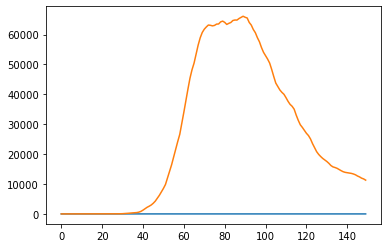

In [143]:
plt.plot(I_theory)
plt.plot(I_data)

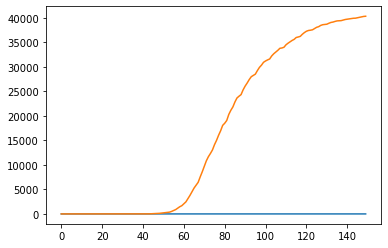

In [144]:
plt.plot(D_theory)
plt.plot(D_data)

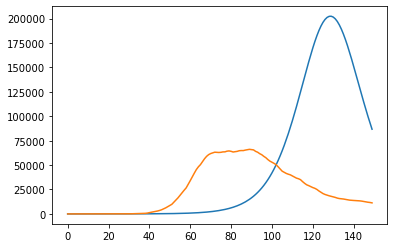

In [98]:
beta_bf = 1.3
gamma_bf =  1.2
q_bf  = 0
mu_bf = 0.0

_, I_theory, _,  _, D_theory = integrate_SIR(S0, I0, Q0, R0, D0, ndays, beta_bf, gamma_bf, q_bf, mu_bf) 

plt.plot(I_theory)
plt.plot(I_data)
#plt.axhline(N)

In [6]:
import pandas
df = pandas.read_csv('../data/time_series_covid19_confirmed_global.csv')

- First case, 1/31/20, index 13, cases 2
- First lockdown, 3/26/20, index 68, cases 20816
- First lockdown end, 6/15/20, index 149, cases 272430
- Second lockdown, 5/11/20, index 292, cases 1123197
- Second lockdown end, 2/12/20, index 319 cases 1659256
- Third lockdown, 6/1/2021, index 354, cases 2836801

In [36]:
df[df['Country/Region'] == 'United Kingdom'].iloc[-1][354:]

1/6/21     2836801
1/7/21     2889419
1/8/21     2957472
1/9/21     3017409
1/10/21    3072349
            ...   
4/15/21    4380976
4/16/21    4383732
4/17/21    4385938
4/18/21    4387820
4/19/21    4390783
Name: 264, Length: 104, dtype: object

In [42]:
354-13

341

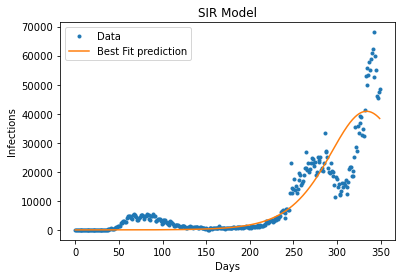

In [67]:
fig = plt.figure()
plt.plot(I_data, '.', label = 'Data')
plt.plot(I_theory, label = 'Best Fit prediction')
plt.xlabel('Days')
plt.ylabel('Infections')
plt.title('SIR Model')
#plt.yscale('log')
plt.legend()

In [2]:
gdsamples = loadMCSamples('../chains/quarantine')

../chains/quarantine.1.txt
Removed no burn in


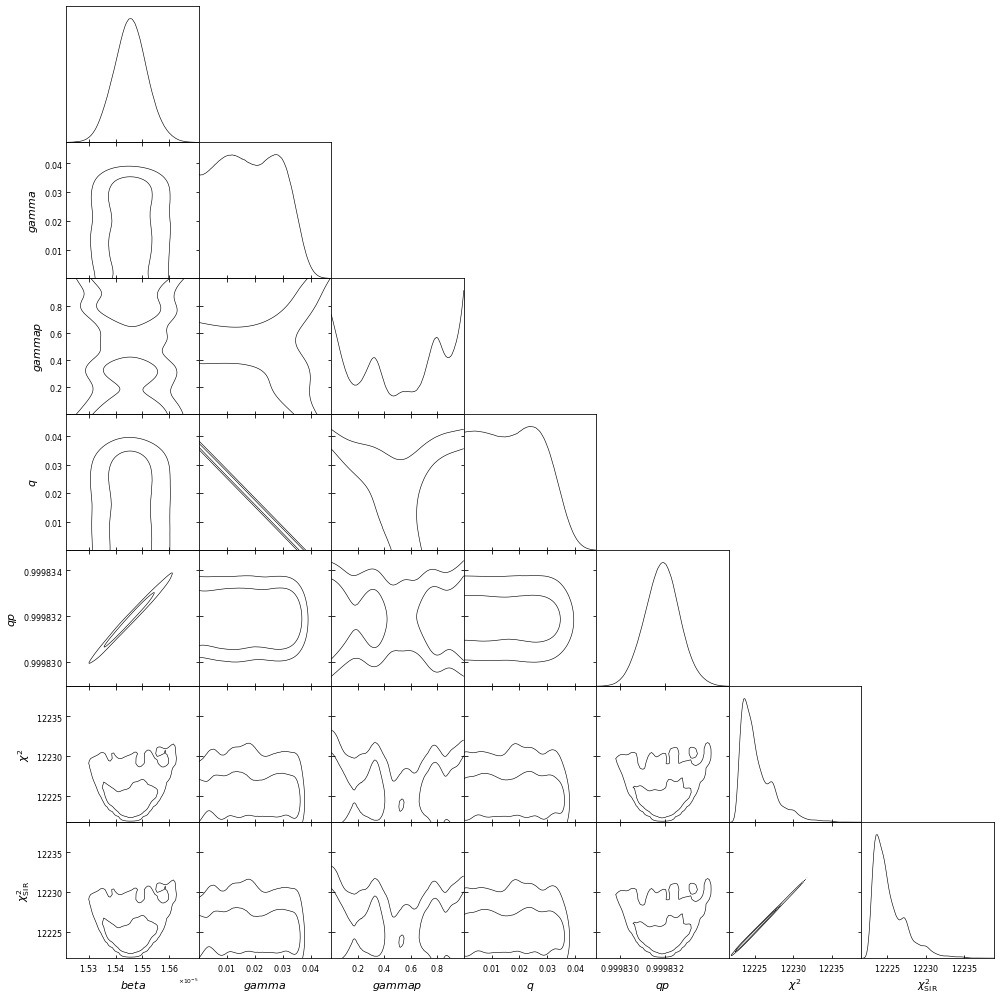

In [3]:
p = gdplt.get_subplot_plotter()
p.triangle_plot(gdsamples)

In [4]:
bestfit = gdsamples.getParamBestFitDict(best_sample=True)
beta_bf = bestfit['beta']
gamma_bf = bestfit['gamma']
gammap_bf = bestfit['gammap']
q_bf = bestfit['q']
qp_bf = bestfit['qp']

I_data, i_firstcase = read_data('../data/time_series_covid19_confirmed_global.csv')
I_data = I_data[i_firstcase:]

# Total population, N.
N = 66.65*1e6 # Approximate population of the UK
# Number of days.
ndays = len(I_data)
# Initial number of infected and recovered individuals, I0 and R0.
I0, Q0, R0 = I_data[0], 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

_, I_theory, _, _= integrate_SIR(S0, I0, Q0, R0, ndays, beta_bf, gamma_bf, 0, 0, gammap_bf, q_bf, qp_bf)

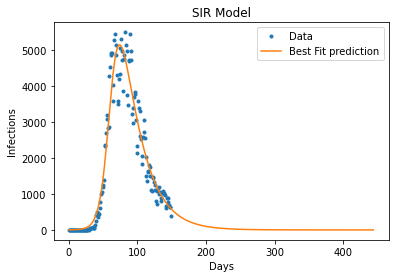

In [5]:
fig = plt.figure()
plt.plot(I_data[:150], '.', label = 'Data')
plt.plot(I_theory, label = 'Best Fit prediction')
plt.xlabel('Days')
plt.ylabel('Infections')
plt.title('SIR Model')
#plt.yscale('log')
plt.legend()

In [2]:
gdsamples = loadMCSamples('../chains/quarantine_full_qq')

../chains/quarantine_full_qq.1.txt
Removed no burn in


LinAlgError: Singular matrix

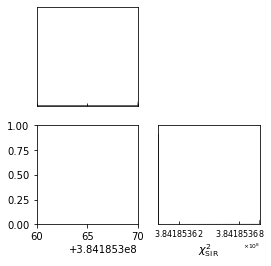

In [3]:
p = gdplt.get_subplot_plotter()
p.triangle_plot(gdsamples)

In [4]:
'''
bestfit = gdsamples.getParamBestFitDict(best_sample=True)
beta_bf = bestfit['beta']
gamma_bf = bestfit['gamma']
gammap_bf = bestfit['gammap']
q_bf = bestfit['q']
'''
beta_bf = 0.265963
gamma_bf = 1/14
gammap_bf = 0
q_bf = 0.

I_data, i_firstcase = read_data('../data/time_series_covid19_confirmed_global.csv')
I_data = I_data[i_firstcase:]

# Total population, N.
N = 66.65*1e6 # Approximate population of the UK
# Number of days.
ndays = len(I_data)
# Initial number of infected and recovered individuals, I0 and R0.
I0, Q0, R0 = I_data[0], 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

_, I_theory, _, _= integrate_SIR(S0, I0, Q0, R0, ndays, beta_bf, gamma_bf, 0, 0, gammap_bf, q_bf)

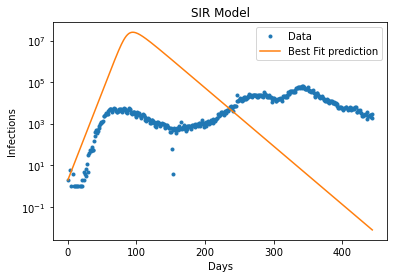

In [5]:
fig = plt.figure()
plt.plot(I_data[:], '.', label = 'Data')
plt.plot(I_theory[:], label = 'Best Fit prediction')
plt.xlabel('Days')
plt.ylabel('Infections')
plt.title('SIR Model')
plt.yscale('log')
plt.legend()
plt.savefig('/Users/Pablo/Desktop/model0.pdf')

In [21]:
        I_data[152] = I_data[151]
        I_data[153] = I_data[154]

In [11]:
def qt(t):
    return 1*(np.exp(-(t-95.5)**2/2./(40.5/2)**2) + np.exp(-(t-292.5)**2/2./(15/2)**2) + np.exp(-(t-393)**2/2./(52/2)**2))

In [12]:
t = np.arange(445)
qqq = qt(t)

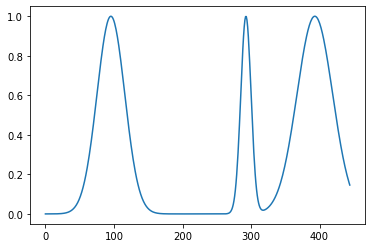

In [13]:
plt.plot(t, qqq)

In [7]:
qqq

0.6181932661524029